In [1]:
import os, sys
#sys.path.append(os.chdir(os.getcwd()+"/.."))
sys.path.append('C:\\Users\\benja\\OneDrive - ETHZ\\PhD\\Projects\\code\\ConveyorBelt')
import numpy as np
import matplotlib.pyplot as plt

from src.potential1D import harmonicOsc1D
from visualisation.plotPotentials import plot_1DPotential, plot_1DPotential_Term
%matplotlib inline

# Simple Potentials

## Harmonic Oscillartor

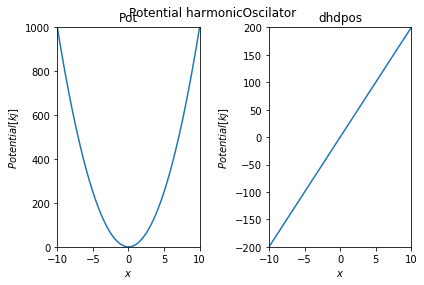

In [2]:
##Build Potential
pot = harmonicOsc1D(x_shift=0, fc=20)

##Params
positions = np.linspace(-10,10)
energies = pot.ene(positions)
dVdpos = pot.dhdpos(positions)

##EXAMPLE PLOT
fig, ax = plot_1DPotential_Term(positions=positions, potential=pot)
fig.tight_layout()

## Flatwell

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2130ea3ae80>)

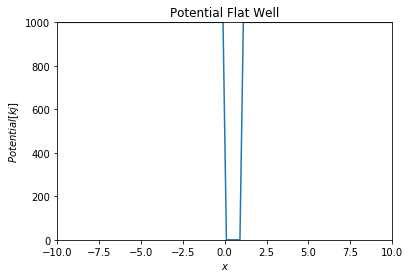

In [3]:
from src.potential1D import flat_well
fw = flat_well()
positions=np.linspace(-10,10,100)
plot_1DPotential(potential=fw, positions=positions, x_range=[-10, 10])


## Lennard Jones

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x197fff459e8>)

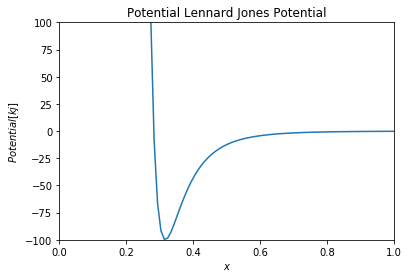

In [3]:
from src.potential1D import lennardJonesPotential

lj=lennardJonesPotential(c6=0.2,c12=0.0001, x_shift=-1)
positions=np.linspace(0.0000001,1,100)

plot_1DPotential(potential=lj, positions=positions, y_range=[-100,100])



## WavePot

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19780397f98>)

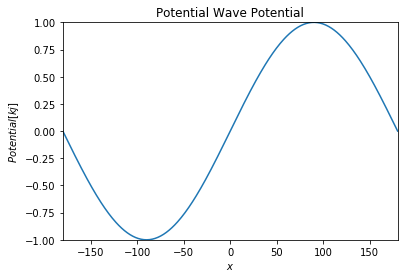

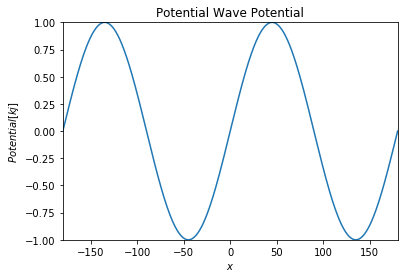

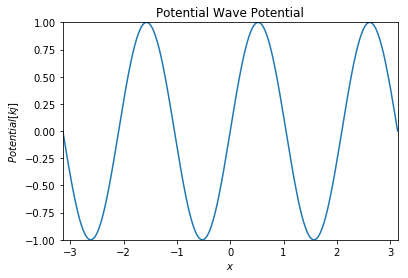

In [4]:
from src.potential1D import wavePotential
import math
wave=wavePotential()
positions=np.linspace(-180, 180, 360)

plot_1DPotential(potential=wave, positions=positions)
wave.multiplicity = 2
plot_1DPotential(potential=wave, positions=positions)

wave.set_radians()
wave.multiplicity = 3
positions=np.deg2rad(np.linspace(-180, 180, 360))
plot_1DPotential(potential=wave, positions=positions)


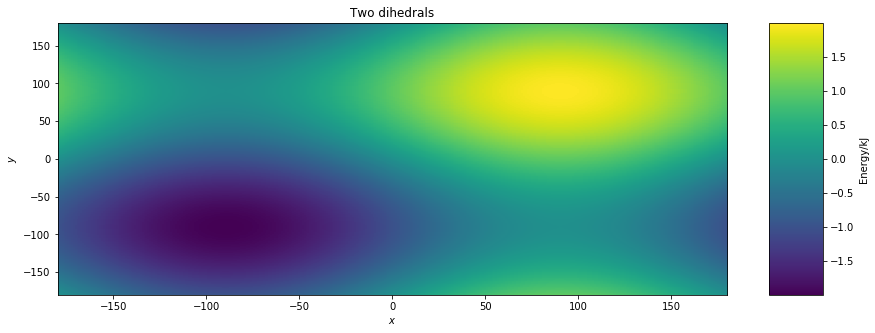

In [4]:
from src.potential1D import wavePotential
from visualisation.plotPotentials import plot_2DEnergy_landscape

wave1=wavePotential()
wave2=wavePotential()
positions=np.linspace(-180, 180, 360)

fig, ax = plot_2DEnergy_landscape(potential1=wave1, potential2=wave1, positions1=positions, positions2=positions, 
                                  title="Two dihedrals", colbar=True)
fig.show()

C:\Users\benja\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


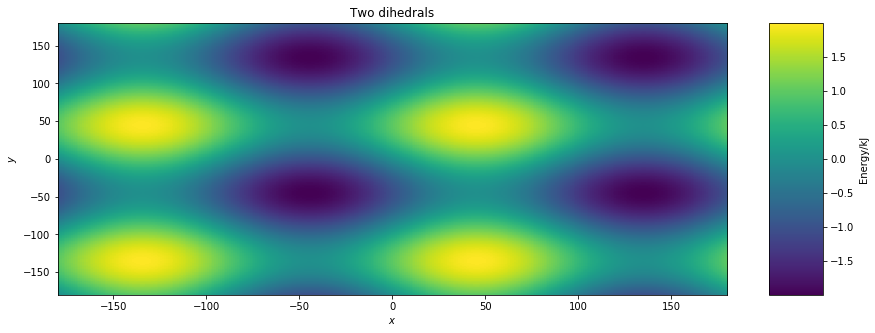

In [3]:
from src.potential1D import wavePotential
from visualisation.plotPotentials import plot_2DEnergy_landscape

wave1=wavePotential(multiplicity=2)
wave2=wavePotential(multiplicity=2)
positions=np.linspace(-180, 180, 360)

plot_2DEnergy_landscape(potential1=wave1, potential2=wave2, positions1=positions, positions2=positions, 
                                  title="Two dihedrals")

### Torsion

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x188ff3fd470>)

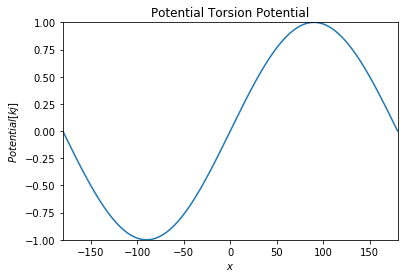

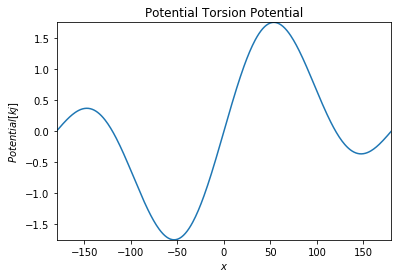

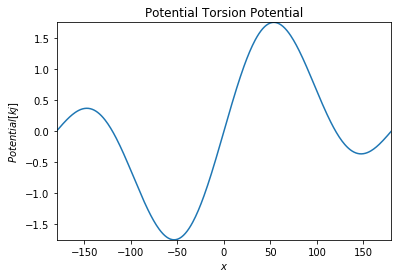

In [3]:
from src.potential1D import torsionPotential, wavePotential
from visualisation.plotPotentials import plot_1DPotential

wave1=wavePotential(multiplicity=1)
wave2=wavePotential(multiplicity=2)
wave3=wavePotential(multiplicity=3)
tors = torsionPotential(wave_potentials=[wave1])
tors1 = torsionPotential(wave_potentials=[wave1, wave2])
tors2 = torsionPotential(wave_potentials=[wave1, wave2, wave3])

positions=np.linspace(-180, 180, 360)

plot_1DPotential(potential=tors, positions=positions)
plot_1DPotential(potential=tors1, positions=positions)
plot_1DPotential(potential=tors2, positions=positions)

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x188ff194cf8>)

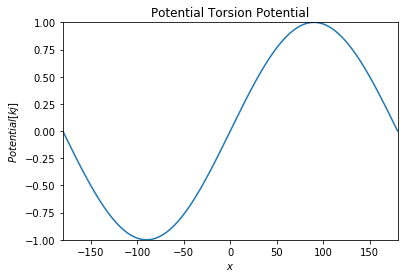

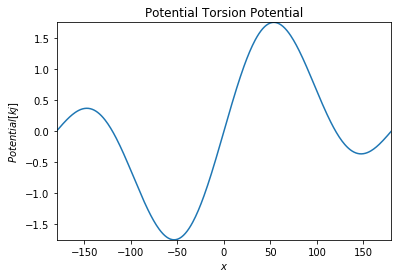

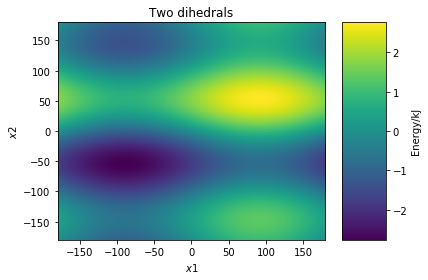

In [2]:

from src.potential1D import torsionPotential, wavePotential
from visualisation.plotPotentials import plot_2DEnergy_landscape

positions=np.linspace(-180, 180, 360)
wave1=wavePotential(multiplicity=1)
wave2=wavePotential(multiplicity=2)
tors = torsionPotential(wave_potentials=[wave1])
tors1 = torsionPotential(wave_potentials=[wave1, wave2])

plot_1DPotential(potential=tors, positions=positions)
plot_1DPotential(potential=tors1, positions=positions)
plot_2DEnergy_landscape(potential1=tors, potential2=tors1, positions1=positions, positions2=positions, 
                                  title="Two dihedrals")

# Perturbed Potentials

C:\Users\benja\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


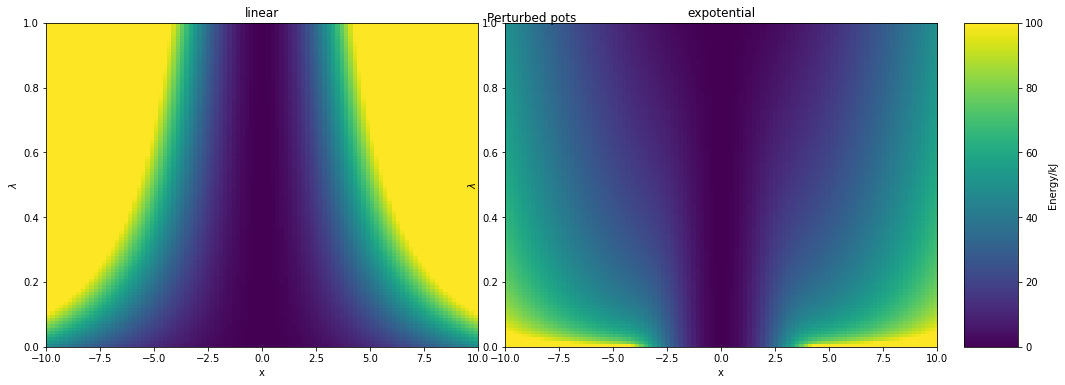

In [3]:
import matplotlib.colorbar as colorbar
from src.potential1D import linCoupledHosc, expCoupledHosc
from visualisation.plotPotentials import plot_2perturbedEnergy_landscape

pot_lin_strech = linCoupledHosc(ha=harmonicOsc1D(fc=1.0, x_shift=0.0), hb=harmonicOsc1D(fc=11.0, x_shift=0.0))
pot_exp_strech = expCoupledHosc(ha=harmonicOsc1D(fc=1.0, x_shift=0.0), hb=harmonicOsc1D(fc=11.0, x_shift=0.0), s=0.025, temp=300.0)

positions=np.linspace(-10, 10, 100)
lam=np.linspace(0,1,100)

#fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_axes([0.05, 0.05, 0.4, 0.9])
ax2 = fig.add_axes([0.475, 0.05, 0.4, 0.9])
ax3 = fig.add_axes([0.9, 0.05, 0.05, 0.9]) 

plot_2perturbedEnergy_landscape(potential=pot_lin_strech, positions=positions, lambdas=lam, colbar=False, ax=ax1, title="linear")
_, ax, surf = plot_2perturbedEnergy_landscape(potential=pot_exp_strech, positions=positions, lambdas=lam, colbar=False, ax=ax2, title="expotential")

fig.colorbar(cax=ax3, mappable=surf, label='Energy/kJ')
fig.suptitle("Perturbed pots")
fig.tight_layout()
#fig.show()

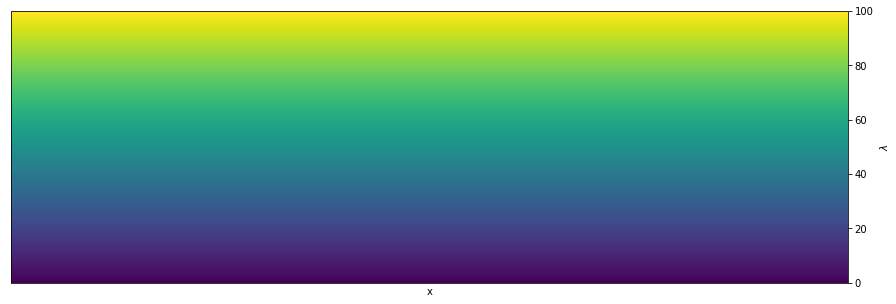

In [20]:
#TODO: buggy?
from src.potential1D import pertHarmonicOsc1D
from visualisation.plotPotentials import plot_2perturbedEnergy_landscape

pot_x_shift=pertHarmonicOsc1D(fc=1.0, alpha=1, gamma=1, lam=0.5)
x=np.linspace(-12.5, 12.5, 100)
lam=np.linspace(0,1,100)

fig, ax, surf = plot_2perturbedEnergy_landscape(potential=pot_x_shift, positions=x, lambdas=lam)
fig.show()


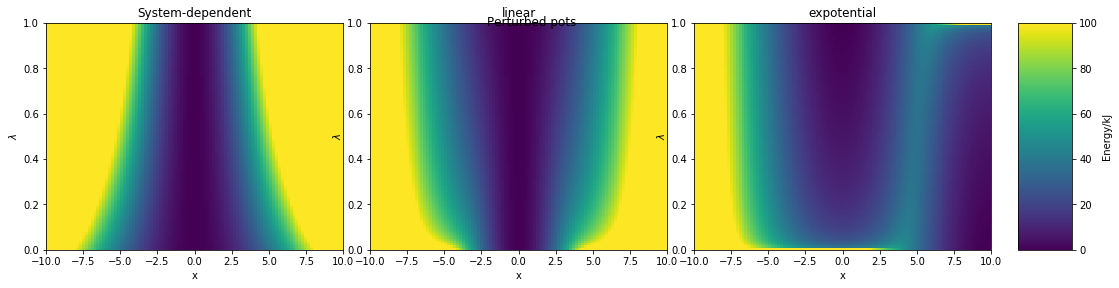

In [5]:
from src.potential1D import linCoupledHosc, expCoupledHosc
from visualisation.plotPotentials import plot_2perturbedEnergy_landscape

x=np.linspace(-10, 10, 100)
lam=np.linspace(0,1,100)

pot_lin_strech = linCoupledHosc(ha=harmonicOsc1D(fc=3.0, x_shift=0.0), hb=harmonicOsc1D(fc=11.0, x_shift=0.0))
pot_exp_strech = expCoupledHosc(ha=harmonicOsc1D(fc=3.0, x_shift=0.0), hb=harmonicOsc1D(fc=11.0, x_shift=0.0), s=0.025, temp=300.0)
pot_lin_x_shift=linCoupledHosc(ha=harmonicOsc1D(fc=3.0, x_shift=0.0), hb=harmonicOsc1D(fc=3.0, x_shift=10.0))
pot_exp_x_shift=expCoupledHosc(ha=harmonicOsc1D(fc=3.0, x_shift=0.0), hb=harmonicOsc1D(fc=3.0, x_shift=10.0), s=0.05, temp=300.0)

#Plotting
fig = plt.figure(figsize=(15,3.5))
ax1 = fig.add_axes([0.05, 0.05, 0.275, 0.9])
ax2 = fig.add_axes([0.35, 0.05, 0.275, 0.9])
ax3 = fig.add_axes([0.65, 0.05, 0.275, 0.9])
ax4 = fig.add_axes([0.95, 0.05, 0.05, 0.9])

plot_2perturbedEnergy_landscape(potential=pot_lin_strech, positions=positions, lambdas=lam, colbar=False, ax=ax1, title="System-dependent")
_,_, surf = plot_2perturbedEnergy_landscape(potential=pot_exp_strech, positions=positions, lambdas=lam, colbar=False, ax=ax2, title="linear")
_, _, _ = plot_2perturbedEnergy_landscape(potential=pot_exp_x_shift, positions=positions, lambdas=lam, colbar=False, ax=ax3, title="expotential")

fig.colorbar(cax=ax4, mappable=surf, label='Energy/kJ')
fig.suptitle("Perturbed pots")
fig.tight_layout()
fig.show()